# Activity 2.3 : Regularization


---

**Name:** Abo, Emmanuel Q.
**Section:** CPE32S8

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Get the size of the sample train data

In [ ]:
x_train[0].shape

(28, 28)

Check the sample train data

In [ ]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [ ]:

y_train[333]

8

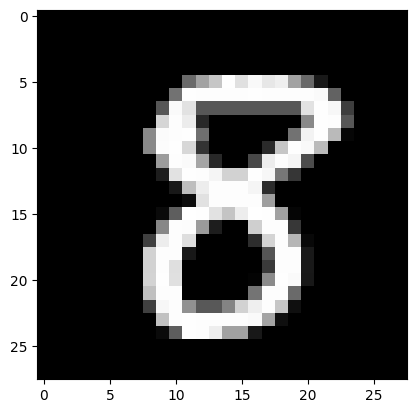

In [ ]:
#Check the actual image
plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [ ]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [ ]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [ ]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [ ]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [ ]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 4s 6ms/step - loss: 0.5130 - accuracy: 0.8459 - val_loss: 0.2082 - val_accuracy: 0.9350
Epoch 2/30
469/469 [==============================] - 4s 8ms/step - loss: 0.2513 - accuracy: 0.9262 - val_loss: 0.1503 - val_accuracy: 0.9532
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2016 - accuracy: 0.9396 - val_loss: 0.1332 - val_accuracy: 0.9577
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1766 - accuracy: 0.9481 - val_loss: 0.1176 - val_accuracy: 0.9638
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.1592 - accuracy: 0.9526 - val_loss: 0.1074 - val_accuracy: 0.9660
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.1460 - accuracy: 0.9567 - val_loss: 0.1010 - val_accuracy: 0.9689
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.1337 - accuracy: 0.9594 - val_loss: 0.0997 - val_accuracy: 0.9714
Epoch 

Use Keras evaluate function to evaluate performance on the test set

In [ ]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09326819330453873
Test accuracy: 0.9768000245094299


> The high accuracy and low test loss means that the model performed well on the test set. The dropout regularization model was used which during training drops out a percentage of neurons in each layer. This creates an ensemble of multiple subnetworks within the same architecture. This method works well for this model since it encourages it to learn more robust and generalizable features by preventing neurons from adapting too much.

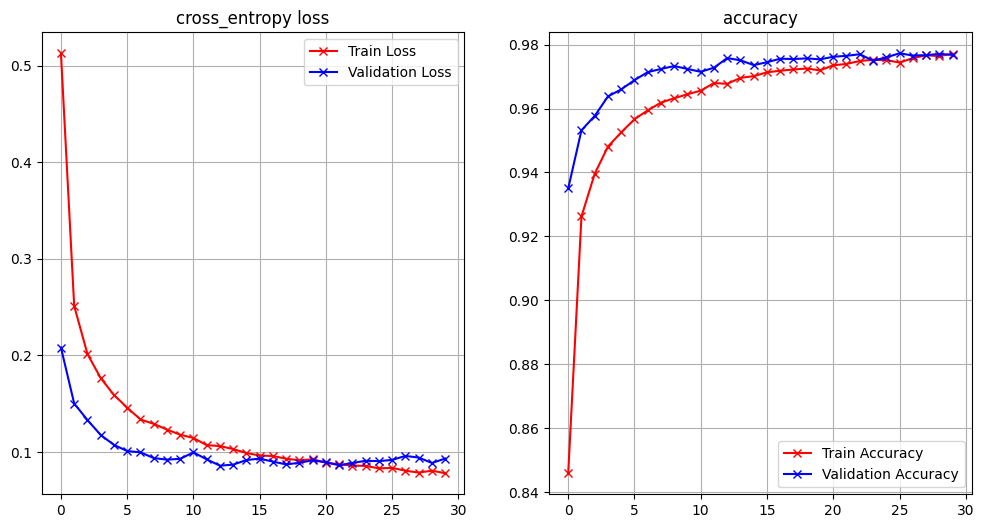

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

# As shown in the graph above, we can tell that the model performed well because the train and validation loss are low and also relatively consistent. The train and validation accuracy is high as well which is good.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [204]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import Adagrad
from keras.optimizers import Adadelta
from keras import regularizers
from keras.callbacks import EarlyStopping

In [206]:
apple_df = pd.read_csv('/content/drive/MyDrive/CPE 313 - Advanced Machine Learning and Deep Learning/Datasets/apple_quality.csv')
apple_df.drop(4000, axis=0, inplace=True)
apple_df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [207]:
apple_df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [208]:
apple_df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [209]:
apple_df['Quality'] = apple_df['Quality'].replace({'good': 1, 'bad': 0})
apple_df['Quality'] = apple_df['Quality'].astype(float)
apple_df['Acidity'] = apple_df['Acidity'].astype(float)
apple_df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality        float64
dtype: object

In [210]:
X = apple_df.iloc[:, :-1].values
y = apple_df["Quality"].values

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=40)

In [212]:
print(X_train.shape)
print(X_test.shape)

(2000, 8)
(2000, 8)


In [213]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [214]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [215]:
#In this model Dropout technique was used
model_1 = Sequential()
model_1.add(Dense(400, activation='relu', input_shape=(8,)))
model_1.add(Dropout(0.4))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 400)               3600      
                                                                 
 dropout_64 (Dropout)        (None, 400)               0         
                                                                 
 dense_115 (Dense)           (None, 300)               120300    
                                                                 
 dropout_65 (Dropout)        (None, 300)               0         
                                                                 
 dense_116 (Dense)           (None, 10)                3010      
                                                                 
Total params: 126910 (495.74 KB)
Trainable params: 126910 (495.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [216]:
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])
hist_1 = model_1.fit(
    X_train_norm, y_train,
    batch_size=128,
    epochs=20,
    verbose=1,
    validation_data=(X_test_norm, y_test))

Epoch 1/20
16/16 [==============================] - 2s 46ms/step - loss: 0.8849 - accuracy: 0.6930 - val_loss: 0.4665 - val_accuracy: 0.7975
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 0.4680 - accuracy: 0.7915 - val_loss: 0.3894 - val_accuracy: 0.8230
Epoch 3/20
16/16 [==============================] - 0s 25ms/step - loss: 0.4168 - accuracy: 0.8145 - val_loss: 0.3557 - val_accuracy: 0.8390
Epoch 4/20
16/16 [==============================] - 0s 24ms/step - loss: 0.3830 - accuracy: 0.8295 - val_loss: 0.3342 - val_accuracy: 0.8440
Epoch 5/20
16/16 [==============================] - 0s 24ms/step - loss: 0.3641 - accuracy: 0.8380 - val_loss: 0.3167 - val_accuracy: 0.8550
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.3492 - accuracy: 0.8435 - val_loss: 0.3239 - val_accuracy: 0.8530
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.3394 - accuracy: 0.8520 - val_loss: 0.3043 - val_accuracy: 0.8660
Epoch 8/20
16

In [217]:
#In this model L2 Regularization and early stopping was used
model_2 = Sequential()
model_2.add(Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(8,)))
model_2.add(Dense(60, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model_2.add(Dense(10, activation='softmax'))
model_2.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 40)                360       
                                                                 
 dense_118 (Dense)           (None, 60)                2460      
                                                                 
 dense_119 (Dense)           (None, 10)                610       
                                                                 
Total params: 3430 (13.40 KB)
Trainable params: 3430 (13.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [218]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
hist_2 = model_2.fit(
    X_train_norm, y_train,
    batch_size=16,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping],
    validation_data=(X_test_norm, y_test))

Epoch 1/50
125/125 [==============================] - 1s 6ms/step - loss: 0.8164 - accuracy: 0.6935 - val_loss: 0.4661 - val_accuracy: 0.7970
Epoch 2/50
125/125 [==============================] - 0s 4ms/step - loss: 0.4203 - accuracy: 0.8140 - val_loss: 0.3806 - val_accuracy: 0.8300
Epoch 3/50
125/125 [==============================] - 1s 5ms/step - loss: 0.3675 - accuracy: 0.8420 - val_loss: 0.3411 - val_accuracy: 0.8590
Epoch 4/50
125/125 [==============================] - 1s 6ms/step - loss: 0.3402 - accuracy: 0.8595 - val_loss: 0.3236 - val_accuracy: 0.8635
Epoch 5/50
125/125 [==============================] - 1s 6ms/step - loss: 0.3222 - accuracy: 0.8655 - val_loss: 0.3102 - val_accuracy: 0.8685
Epoch 6/50
125/125 [==============================] - 1s 5ms/step - loss: 0.3096 - accuracy: 0.8730 - val_loss: 0.3067 - val_accuracy: 0.8690
Epoch 7/50
125/125 [==============================] - 1s 6ms/step - loss: 0.2990 - accuracy: 0.8710 - val_loss: 0.3089 - val_accuracy: 0.8550
Epoch 

In [222]:
score_1 = model_1.evaluate(X_test_norm, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])
score_2 = model_2.evaluate(X_test_norm, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.27031999826431274
Test accuracy: 0.8859999775886536
Test loss: 0.24409149587154388
Test accuracy: 0.902999997138977


##**Comparison of results of model_1 and model_2:**
---
Compared to model_1 with an 88% accuracy and 27% validation loss, model_2 seems to have a higher accuracy (90%) and less validation loss (24%). Not a significant amount of change but still yielded a better result than model_1.

In [224]:
#In this model L2 Regularization was used
model_3 = Sequential()
model_3.add(Dense(400, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(8,)))
model_3.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model_3.add(Dense(10, activation='softmax'))
model_3.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 400)               3600      
                                                                 
 dense_124 (Dense)           (None, 300)               120300    
                                                                 
 dense_125 (Dense)           (None, 10)                3010      
                                                                 
Total params: 126910 (495.74 KB)
Trainable params: 126910 (495.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [238]:
model_3.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01), #changed the optimzer to SGD
              metrics=['accuracy'])
hist_3 = model_3.fit(
    X_train_norm, y_train,
    batch_size=128,
    epochs=24,
    verbose=1,
    validation_data=(X_test_norm, y_test))

Epoch 1/24
16/16 [==============================] - 2s 43ms/step - loss: 0.0741 - accuracy: 0.9895 - val_loss: 0.2111 - val_accuracy: 0.9350
Epoch 2/24
16/16 [==============================] - 0s 22ms/step - loss: 0.0741 - accuracy: 0.9895 - val_loss: 0.2112 - val_accuracy: 0.9350
Epoch 3/24
16/16 [==============================] - 0s 25ms/step - loss: 0.0740 - accuracy: 0.9895 - val_loss: 0.2112 - val_accuracy: 0.9345
Epoch 4/24
16/16 [==============================] - 0s 20ms/step - loss: 0.0740 - accuracy: 0.9895 - val_loss: 0.2113 - val_accuracy: 0.9350
Epoch 5/24
16/16 [==============================] - 0s 21ms/step - loss: 0.0739 - accuracy: 0.9895 - val_loss: 0.2113 - val_accuracy: 0.9350
Epoch 6/24
16/16 [==============================] - 0s 20ms/step - loss: 0.0739 - accuracy: 0.9895 - val_loss: 0.2114 - val_accuracy: 0.9345
Epoch 7/24
16/16 [==============================] - 0s 22ms/step - loss: 0.0738 - accuracy: 0.9895 - val_loss: 0.2114 - val_accuracy: 0.9350
Epoch 8/24
16

> In this model, I tried experimenting on the batch size, epochs, learning rate, and optimzers used and got a better result than model_1 and model_2.

#### Conclusion

#In this activity, I have learned a few regularization techniques such as the dropout technique which can effectively improve a model performance by addressing overfitting. I've used other techniques such as L2 (Ridge) regularization which encourages the model to learn smaller weights so that it will not rely on a single feature. I also tried early stopping; this method stops the training when the performance of the model stops improving to prevent overfitting. I tried to use the L1 (Lasso) regularization but the results were poor and actually decreased the performance from the previous models I did with other techniques. Overall, I have learned that regularization techniques help prevent overfitting and improve the generalization ability of machine learning models by controlling the complexity of the model and preventing it from memorizing the noise in the training data which enables the model to perform better on unseen data — leading to more reliable and accurate predictions.

Google Colab Link: https://colab.research.google.com/drive/1sjWOrpkZSi_j-3y_dAcKf1lhBvTfF0_0?usp=sharing